In [106]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [107]:
# Load the dataset
data = pd.read_csv("modified_file.csv", encoding='latin1')
data.head()

,Unnamed: 0.1,Unnamed: 0,popularity,disc_number,duration_ms,track_number,album_total_tracks,principal_artist_followers,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,0,0,73,1,227600,4,10,2412278,0.70100,0.397,...,0,0.1160,-13.155,1,0.0331,171.282,4,0.268,1986,3.793333
1,1,1,61,1,220840,9,13,2609297,0.01610,0.883,...,6,0.2280,-13.232,0,0.9440,91.753,4,0.578,1986,3.680667
2,2,2,68,1,157440,11,13,2609297,0.00203,0.914,...,6,0.0992,-8.435,0,0.3300,116.371,4,0.655,1986,2.624000
3,3,3,66,1,256293,9,9,4954824,0.00835,0.581,...,6,0.1420,-7.262,1,0.0324,123.887,3,0.619,1986,4.271550
4,4,4,63,1,184160,1,20,1315248,0.29400,0.685,...,2,0.3580,-10.906,1,0.0289,121.761,4,0.853,1986,3.069333


In [108]:
#Convert to binary
#binary_column = pd.get_dummies(data['principle_artist_followers'])

#Write back to CSV
#df = pd.concat([data.drop('principle_artist_followers', axis=1), binary_column], axis=1)

# Optionally, write the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)

In [109]:
# Define features set
X = data.copy()
X.drop("popularity", axis=1, inplace=True)
X.head()


,Unnamed: 0.1,Unnamed: 0,disc_number,duration_ms,track_number,album_total_tracks,principal_artist_followers,acousticness,danceability,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,0,0,1,227600,4,10,2412278,0.70100,0.397,0.207,0,0.1160,-13.155,1,0.0331,171.282,4,0.268,1986,3.793333
1,1,1,1,220840,9,13,2609297,0.01610,0.883,0.553,6,0.2280,-13.232,0,0.9440,91.753,4,0.578,1986,3.680667
2,2,2,1,157440,11,13,2609297,0.00203,0.914,0.586,6,0.0992,-8.435,0,0.3300,116.371,4,0.655,1986,2.624000
3,3,3,1,256293,9,9,4954824,0.00835,0.581,0.791,6,0.1420,-7.262,1,0.0324,123.887,3,0.619,1986,4.271550
4,4,4,1,184160,1,20,1315248,0.29400,0.685,0.594,2,0.3580,-10.906,1,0.0289,121.761,4,0.853,1986,3.069333


In [110]:
# List of column names corresponding to features you want to use
# selected_features = ['acousticness', 'key', 'tempo', 'energy']

# Subset the DataFrame to include only the selected features
# X = data[selected_features]
# print(X)

In [111]:
# Define target vector
y = data["popularity"].values.reshape(-1, 1)
y[:5]

array([[73],
       [61],
       [68],
       [66],
       [63]], dtype=int64)

In [112]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [113]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [114]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [115]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [116]:
# Split data into features and target variable
X = data.drop('popularity', axis=1)
y = data['popularity']


In [117]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)


In [118]:
# Initialize Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=78)


In [119]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=78)

Feature ranking:
1. Feature 0: 0.29404781536675845
2. Feature 18: 0.25695005568497004
3. Feature 1: 0.14890086950298165
4. Feature 6: 0.07667969227906105
5. Feature 14: 0.023217505546541898
6. Feature 7: 0.020715529424843827
7. Feature 12: 0.0203706609472584
8. Feature 11: 0.02009760739741666
9. Feature 17: 0.019967183911889928
10. Feature 8: 0.01956621341173262
11. Feature 15: 0.019105230841086323
12. Feature 9: 0.016034116879097764
13. Feature 5: 0.01593696077815109
14. Feature 19: 0.011295764609334165
15. Feature 4: 0.011066767927707874
16. Feature 3: 0.011000512657621298
17. Feature 10: 0.01091731465436673
18. Feature 13: 0.0027711456804755848
19. Feature 16: 0.0011219327499599027
20. Feature 2: 0.00023711974874486712


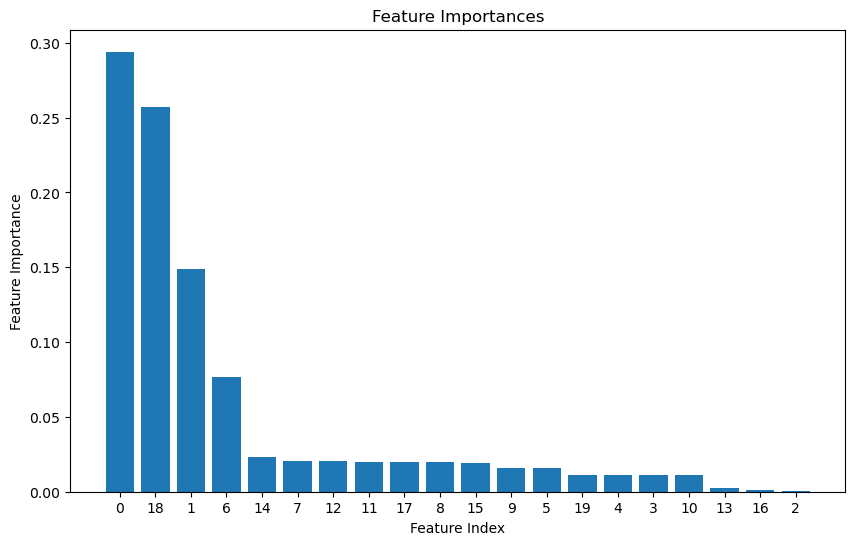

In [120]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()

In [121]:
# Predict on the testing set
y_pred = model.predict(X_test)
y_pred

array([67.05, 65.82, 70.18, ..., 86.27, 59.33, 78.67])

In [122]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 20.308318932038834


In [123]:
# Create the random forest regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [124]:
X = np.random.rand(1000, 19)

y = np.random.rand(1000, 19)

if len(y) > len(X):
    y = y[:len(X)]
elif len(y) < len(X):
    
    y = np.concatenate([y, np.zeros(len(X) - len(y))])


In [125]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000, 19)
Shape of y: (1000, 19)


In [126]:
X_train_scaled

array([[ 1.25712836,  0.07513444,  5.33769217, ..., -2.04182251,
         1.25519963,  0.49680899],
       [-0.31194181, -1.43036207, -0.09106849, ...,  0.19645986,
        -0.29109541,  0.37364653],
       [-1.11408643, -0.39815039, -0.09106849, ...,  0.6287024 ,
        -1.20068073,  1.12773174],
       ...,
       [ 0.11918815, -1.61066105, -0.09106849, ...,  1.74193084,
         0.16369725,  1.30494313],
       [-1.588633  , -0.54013584, -0.09106849, ..., -0.01966141,
        -1.56451485,  1.1036743 ],
       [ 0.36784691,  0.23514979, -0.09106849, ...,  1.13842238,
         0.34561431, -0.11372688]])

In [127]:
y_train.ravel()

array([72, 65, 52, ..., 80, 58, 60], dtype=int64)

In [128]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [129]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [130]:
#decision_path(predictions)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [131]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [132]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [133]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

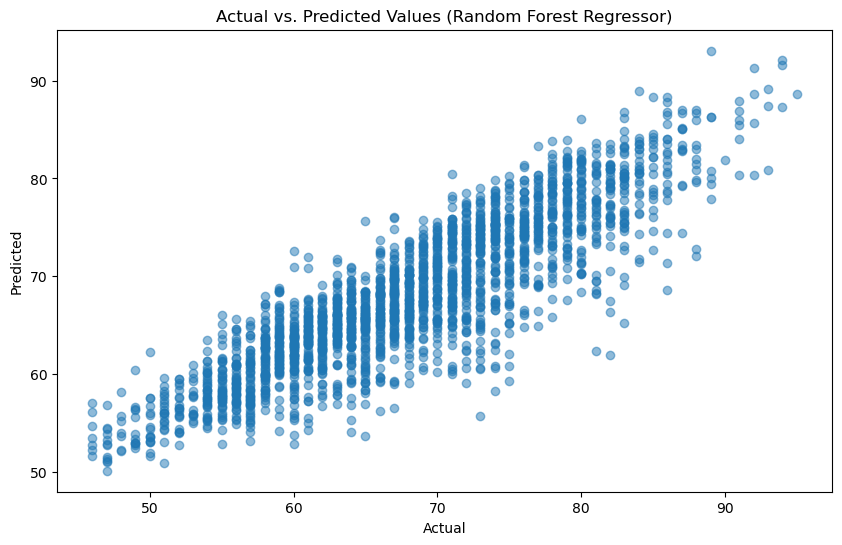

In [134]:
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.show()

In [135]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Displaying results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 20.308318932038834
R-squared Score: 0.7691182334454695


In [136]:
# Mean Squared Error (MSE): It measures the average squared 
# difference between the actual and predicted values. 
# A lower MSE indicates better model performance, with zero representing a perfect fit.

# R-squared Score (R2): It represents the proportion of the variance
# in the target variable that is explained by the model. R2 score ranges
# from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model
# does not explain any of the variability in the target variable better than the mean.